# Missing Data

NaN is the default missing value marker for reasons of computational speed and convenience.  
Pandas will be able to easily detect a NaN value with data of different types: floating point, integer, boolean, and general object.

In [46]:
import numpy as np
np.random.seed(0)
import pandas as pd

In [47]:
print(1 + np.nan)

nan


In [48]:
print(0 *  np.nan)

nan


In [49]:
print(np.nan != np.nan)

True


In [50]:
print(np.nan == np.nan)

False


In [51]:
data = np.array([1, None, 3, 4])

print(data)

[1 None 3 4]


In [52]:
data = np.array([1, np.nan, 3, 4]) 

print(data)

[ 1. nan  3.  4.]


In [53]:
print(np.sum(data))

nan


In [54]:
print(np.nansum(data))

8.0


In [55]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

## Pandas NaN Examples

In [56]:
def highlight_nan(data: pd.DataFrame, color: str) -> pd.DataFrame:
    attr = f'background-color: {color}'
    is_nan = pd.isna(data)
    return pd.DataFrame(
        np.where(is_nan, attr, ''),
        index=data.index,
        columns=data.columns
    )

def df_info(df: pd.DataFrame) -> None:
    return df.style.apply(
        highlight_nan,
        color='darkorange',
        axis=None
    )

In [57]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    index=["a", "c", "e", "f", "h"],
    columns=["one", "two", "three"],
)

df_info(df)

,one,two,three
a,1.764052,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,0.144044,1.454274
h,0.761038,0.121675,0.443863


In [58]:
df["one"]["a"] = None
df["two"]["f"] = None

df_info(df)

,one,two,three
a,nan,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,nan,1.454274
h,0.761038,0.121675,0.443863


In [59]:
df_info(pd.isna(df))

,one,two,three
a,True,False,False
c,False,False,False
e,False,False,False
f,False,True,False
h,False,False,False


In [61]:
df_check = pd.isna(df)

df_check.any(axis=1)  # internally used for the dropna function

a     True
c    False
e    False
f     True
h    False
dtype: bool

#### Remove NaN Values

In [16]:
df_info(df.dropna())  #default is drop rows

,one,two,three
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
h,0.761038,0.121675,0.443863


In [17]:
df_info(df.dropna(axis='columns'))

,three
a,0.978738
c,-0.977278
e,-0.103219
f,1.454274
h,0.443863


In [18]:
df_info(df.dropna(axis='rows')) #same as default

,one,two,three
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
h,0.761038,0.121675,0.443863


Operations with NaN Values

- When summing data, NA (missing) values will be treated as zero.
- If the data are all NA, the result will be 0.
- Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In [19]:
df_info(df)

,one,two,three
a,nan,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,nan,1.454274
h,0.761038,0.121675,0.443863


In [63]:
print(df["two"].sum())  #pandas automatically treats nan as zero for addition, in np you have to use nansum()

2.238033006712321


In [21]:
print(df.sum())

one      4.362618
two      2.238033
three    1.796378
dtype: float64


#### Fill NaN values

In [22]:
df_info(df.fillna(value=0.0))

,one,two,three
a,0.000000,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,0.000000,1.454274
h,0.761038,0.121675,0.443863


In [23]:
df_info(df.fillna("missing"))

,one,two,three
a,missing,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,missing,1.454274
h,0.761038,0.121675,0.443863


#### Interpolate

In [67]:
num_samples = 10

index = pd.date_range(
    "21/4/2021",
    periods=num_samples
)

values = 2 * np.sort(np.random.randn(num_samples)) + 1
df = pd.DataFrame(values, index, ['temperature'])
df.iloc[2] = None
df.iloc[6] = None

df_info(df)

,temperature
2021-04-21 00:00:00,-2.412540
2021-04-22 00:00:00,-1.840036
2021-04-23 00:00:00,nan
2021-04-24 00:00:00,-0.019304
2021-04-25 00:00:00,0.225346
2021-04-26 00:00:00,0.395394
2021-04-27 00:00:00,nan
2021-04-28 00:00:00,3.404760
2021-04-29 00:00:00,3.460581
2021-04-30 00:00:00,4.901551


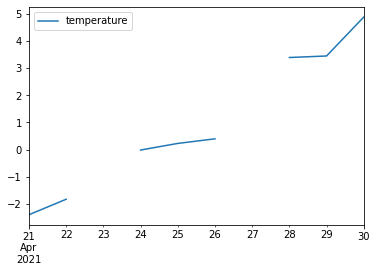

In [68]:
df.plot();

In [69]:
df_info(df.interpolate())

,temperature
2021-04-21 00:00:00,-2.412540
2021-04-22 00:00:00,-1.840036
2021-04-23 00:00:00,-0.929670
2021-04-24 00:00:00,-0.019304
2021-04-25 00:00:00,0.225346
2021-04-26 00:00:00,0.395394
2021-04-27 00:00:00,1.900077
2021-04-28 00:00:00,3.404760
2021-04-29 00:00:00,3.460581
2021-04-30 00:00:00,4.901551


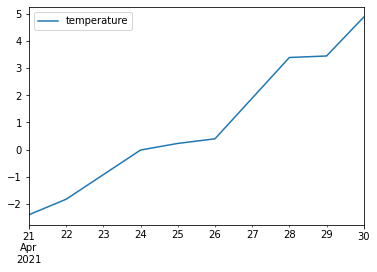

In [70]:
df.interpolate().plot();